Problem Statement: To predict whether a passenger will survive in the sinking Titanic ship

In [3]:
'''
Project Overview: Here is how I tried to find a solution to the problem by dividing the project into broader parts. 

1. Exploratory Data Analysis: 

a) Getting familiar with the data (shape, value_counts).
b) Identifying the numerical and categorical columns
c) Understanding the distributions of the numerical and the categorical columns 
   by plotting graphs
   Numerical columns - Histograms, box plots (outlier detection)
   Categorical columns - Count plots
d) Exploring possible correlations between features and output(Survived) which may help in feature selection

2. Feature Engineering
a) Missing values: Detecting missing values and filling the missing values accordingly for different columns
b) Handling outliers in the data
c) Converting categorical columns to numerical by encoding
d) Extracting new columns if possible from existing columns


3) Feature Selection
a) Finding correlations between features
b) Visualizing the correlations for better understanding and eliminating features having very high correlation

4) Data preprocessing
a) Removing unwanted columns
b) Data Cleaning

5) Feature Scaling
a) Is feature scaling required? Method?

6) Model Building
a) Applying different algorithms and finding which yields the best results.

'''

'\nProject Overview: Here is how I tried to find a solution to the problem by dividing the project into broader parts. \n\n1. Exploratory Data Analysis: \n\na) Getting familiar with the data (shape, value_counts).\nb) Identifying the numerical and categorical columns\nc) Understanding the distributions of the numerical and the categorical columns \n   by plotting graphs\n   Numerical columns - Histograms, box plots (outlier detection)\n   Categorical columns - Count plots\nd) Exploring possible correlations between features and output(Survived) which may help in feature selection\n\n2. Feature Engineering\na) Missing values: Detecting missing values and filling the missing values accordingly for different columns\nb) Handling outliers in the data\nc) Converting categorical columns to numerical by encoding\nd) Extracting new columns if possible from existing columns\n\n\n3) Feature Selection\na) Finding correlations between features\nb) Visualizing the correlations for better understand

In [4]:
# Importing essential Libraries
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [5]:
# Loading the dataset
train = pd.read_csv("C:/Users/2068671/Downloads/titanic/train.csv")
test = pd.read_csv("C:/Users/2068671/Downloads/titanic/test.csv")

Exploratory Data Analysis

Note: Exploratory data analysis has to be performed on the combined data (both testing and training). 
Hence we combine the data for EDA

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train.shape

(891, 12)

In [9]:
test.shape

(418, 11)

In [10]:
# Combining the training and the testing data
train['is_test'] = 0
test['is_test'] = 1
test['Survived'] = np.NAN

In [11]:
df = pd.concat(objs= [train, test])

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [13]:
df.shape

(1309, 13)

Now our data is ready for EDA

In [14]:
df['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [15]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'is_test'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  is_test      1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB


DATA DICTIONARY: (WHAT EACH COLUMN DENOTES)

'PassengerId': Id of the onboard passenger   
'Survived':  Whether the passenger has survived or not (Output Variable)   
'Pclass': Ticket class (1st, 2nd and 3rd)      
'Name': Name of the passenger     
'Sex': Gender      
'Age': Age of the passenger       
'SibSp': No of siblings/spouses onboard    
'Parch': No of parent/children onboard     
'Ticket': Ticket Number        
'Fare': Passenger fare           
'Cabin': Cabin Number               
'Embarked': Port of embarkation/boarding the ship;  C = Cherbourg, Q = Queenstown, S = Southampton        
'is_test': belongs to test dataset?               


In [17]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,is_test
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,0.319328
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,0.466394
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


Plotting histograms for numerical data

In [18]:
def hist_plot(data, feature):
    plt.hist(data[feature])
    plt.title(feature)

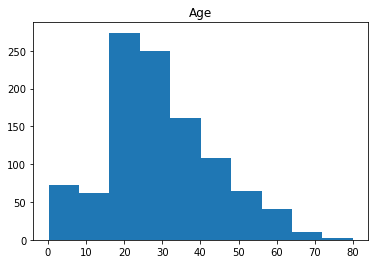

In [19]:
hist_plot(df, "Age")

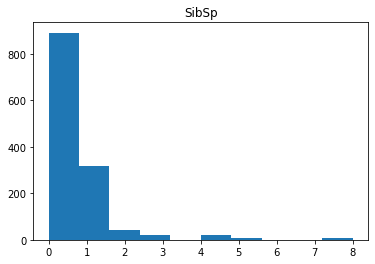

In [20]:
hist_plot(df, "SibSp")

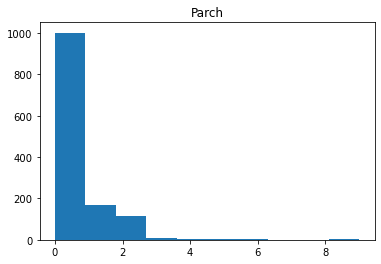

In [21]:
hist_plot(df, "Parch")

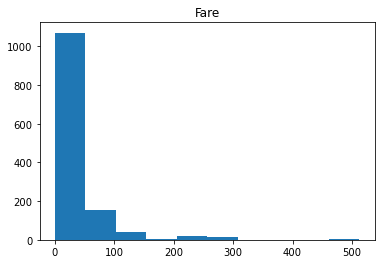

In [22]:
hist_plot(df, "Fare")

df.corr()

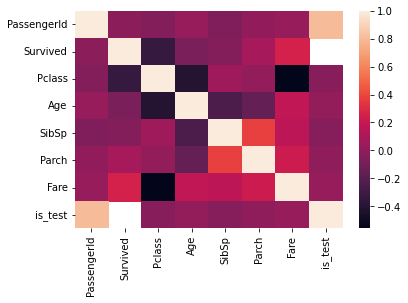

In [23]:
sns.heatmap(df.corr())

Insight: No columns having correlation > 0.8, hence no feature is eliminated in this stage

Plotting count plots for categorical features

In [24]:
def count_plot(data, cat_feature):
    ax = sns.countplot(data= data[data["is_test"] == 0], x = cat_feature, hue = "Survived")
    plt.title(cat_feature)


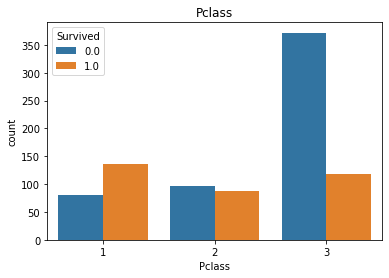

In [25]:
count_plot(df, "Pclass")

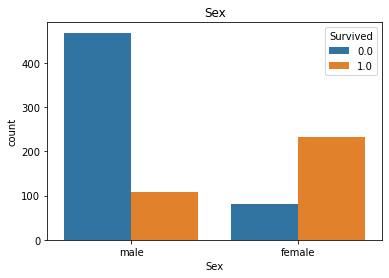

In [26]:
count_plot(df, "Sex")

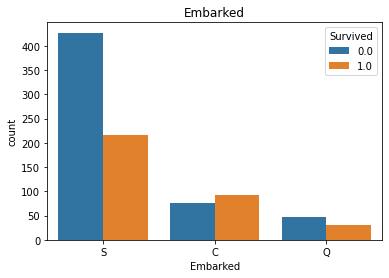

In [27]:
count_plot(df, "Embarked")

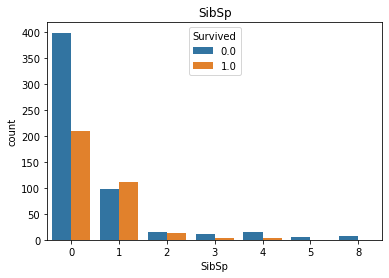

In [28]:
count_plot(df, "SibSp")

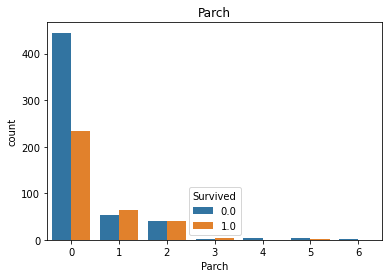

In [29]:
count_plot(df, "Parch")

FEATURE ENGINEERING

1. Cabin initials 

In [30]:
df["cabin_init"] = df["Cabin"].apply(lambda x: str(x)[0])

In [31]:
df["cabin_init"].value_counts()

n    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: cabin_init, dtype: int64

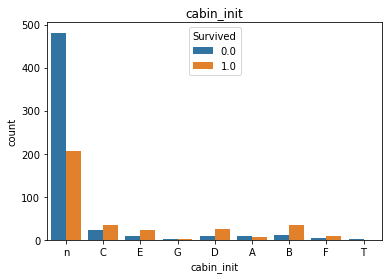

In [32]:
count_plot(df, "cabin_init")

2. Extracting Designation feature from Name

In [33]:
# Sample Name : Allen, Mr. William Henry
df["Designation"] = df["Name"].apply(lambda x: x.split(",")[1].split(".")[0].strip())

In [34]:
df["Designation"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Designation, dtype: int64

Top 4 have the maximum records, clubbing the rest in 'others'.

In [35]:
top_4 = ["Mr", "Miss", "Mrs", "Master"]
df["Designation"] = df["Designation"].apply(lambda x: x if x in top_4 else "Others")
df["Designation"].value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
Others     34
Name: Designation, dtype: int64

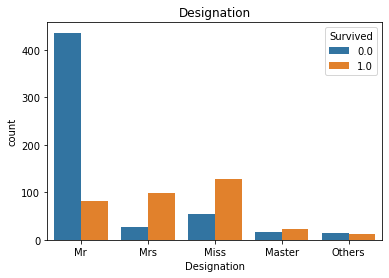

In [36]:
count_plot(df, "Designation")

3. Dropping unwanted columns

In [37]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'is_test', 'cabin_init',
       'Designation'],
      dtype='object')

Dropping PassengerId, Name, Ticket, Cabin

In [38]:
print("Before dropping unwanted columns, shape: {}".format(df.shape))
df.drop(['PassengerId', 'Ticket','Cabin', 'Name'], axis = 1, inplace= True)
print("After dropping unwanted columns, shape: {}".format(df.shape))

Before dropping unwanted columns, shape: (1309, 15)
After dropping unwanted columns, shape: (1309, 11)


4. Handling Missing Values

In [39]:
df.isna().any()

Survived        True
Pclass         False
Sex            False
Age             True
SibSp          False
Parch          False
Fare            True
Embarked        True
is_test        False
cabin_init     False
Designation    False
dtype: bool

In [40]:
df.isnull().sum()

Survived       418
Pclass           0
Sex              0
Age            263
SibSp            0
Parch            0
Fare             1
Embarked         2
is_test          0
cabin_init       0
Designation      0
dtype: int64

In [41]:
# Function to plot histogram of numerical features 
def num_hist_plot(data, feature):
    sns.histplot(data[feature], bins= 10)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.title("{} Distribution".format(feature))

In [42]:
# Function to plot boxplot of numerical features 
def num_box_plot(data, feature):
    sns.boxplot(x =  df[feature])
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.title("{} Distribution".format(feature))

Handling missing values in Age feature

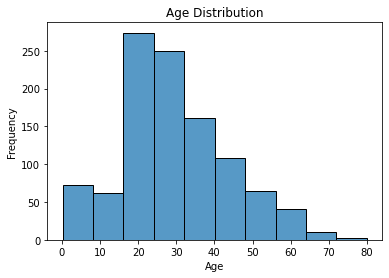

In [43]:
num_hist_plot(df, "Age")

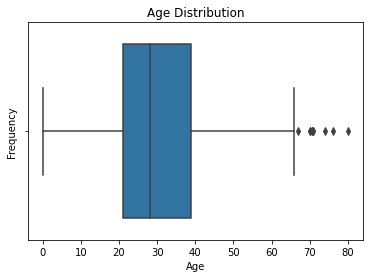

In [44]:
num_box_plot(df, "Age")

In [45]:
# Function for median imputation
def median_impute(data, feature):
    print("Before imputation, number of Nan values in {} {}".format(feature, data[feature].isnull().sum()))
    data[feature].fillna(value = data[feature].median(), inplace= True)
    print("After median imputation, number of Nan values in {} {}".format(feature, data[feature].isnull().sum()))

In [46]:
median_impute(df, "Age")

Before imputation, number of Nan values in Age 263
After median imputation, number of Nan values in Age 0


Handling Missing Values in 'Fare' column

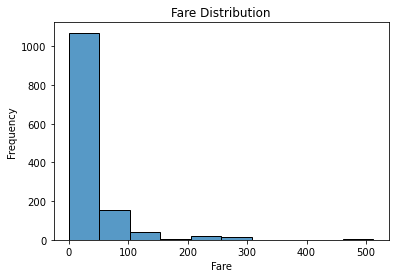

In [47]:
num_hist_plot(df,"Fare")

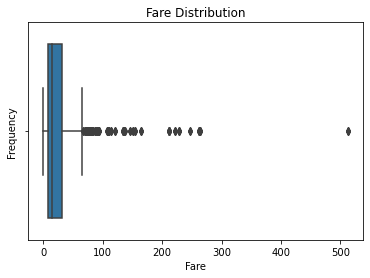

In [48]:
num_box_plot(df, "Fare")

In [49]:
median_impute(df, "Fare")

Before imputation, number of Nan values in Fare 1
After median imputation, number of Nan values in Fare 0


Handling Missing values in Embarked feature(Categorical)

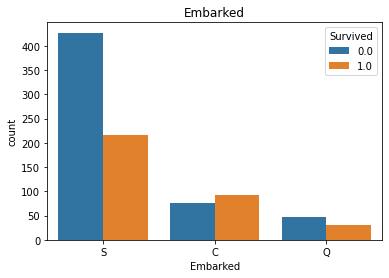

In [50]:
count_plot(df, "Embarked")

In [51]:
def most_frequent_impute(data, feature):
    print("Before imputation, number of Nan values in {} {}".format(feature, data[feature].isnull().sum()))
    data[feature].fillna(value = data[feature].mode()[0], inplace= True)
    print("After imputation, number of Nan values in {} {}".format(feature, data[feature].isnull().sum()))

In [52]:
most_frequent_impute(df, "Embarked")

Before imputation, number of Nan values in Embarked 2
After imputation, number of Nan values in Embarked 0


In [53]:
df.isnull().sum()

Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
is_test          0
cabin_init       0
Designation      0
dtype: int64

Hence all the missing values have been filled

5. Converting Categorical feature to Numerical feature for better model performance

A) Age - Ordinal Label Encoding

In [54]:
ordinal_labels_sex = {"male": 0, "female":1}
df["Sex"] = df["Sex"].map(ordinal_labels_sex)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_test,cabin_init,Designation
0,0.0,3,0,22.0,1,0,7.2500,S,0,n,Mr
1,1.0,1,1,38.0,1,0,71.2833,C,0,C,Mrs
2,1.0,3,1,26.0,0,0,7.9250,S,0,n,Miss
3,1.0,1,1,35.0,1,0,53.1000,S,0,C,Mrs
4,0.0,3,0,35.0,0,0,8.0500,S,0,n,Mr
...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,0,28.0,0,0,8.0500,S,1,n,Mr
414,NaN,1,1,39.0,0,0,108.9000,C,1,C,Others
415,NaN,3,0,38.5,0,0,7.2500,S,1,n,Mr
416,NaN,3,0,28.0,0,0,8.0500,S,1,n,Mr


B) Embarked - Most frequent label encoding

In [55]:
labels_embarked = df["Embarked"].value_counts().nlargest().index
labels_embarked

Index(['S', 'C', 'Q'], dtype='object')

In [56]:
ordinal_labels_embarked = {a:b for b,a in enumerate(labels_embarked, 0)}
ordinal_labels_embarked
df["Embarked"] = df["Embarked"].map(ordinal_labels_embarked)

In [57]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_test,cabin_init,Designation
0,0.0,3,0,22.0,1,0,7.2500,0,0,n,Mr
1,1.0,1,1,38.0,1,0,71.2833,1,0,C,Mrs
2,1.0,3,1,26.0,0,0,7.9250,0,0,n,Miss
3,1.0,1,1,35.0,1,0,53.1000,0,0,C,Mrs
4,0.0,3,0,35.0,0,0,8.0500,0,0,n,Mr


C) Cabin_init and Designation: One Hot Encoding

In [58]:
print('Shape before encoding: {}'.format(df.shape))
df = pd.get_dummies(data=df, columns=[ 'Designation', 'cabin_init'], drop_first=True)
print('Shape after encoding: {}'.format(df.shape))

Shape before encoding: (1309, 11)
Shape after encoding: (1309, 21)


In [59]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_test,Designation_Miss,...,Designation_Mrs,Designation_Others,cabin_init_B,cabin_init_C,cabin_init_D,cabin_init_E,cabin_init_F,cabin_init_G,cabin_init_T,cabin_init_n
0,0.0,3,0,22.0,1,0,7.2500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,1,1,38.0,1,0,71.2833,1,0,0,...,1,0,0,1,0,0,0,0,0,0
2,1.0,3,1,26.0,0,0,7.9250,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1.0,1,1,35.0,1,0,53.1000,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,0.0,3,0,35.0,0,0,8.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Feature engineering is completed

Splitting the data into training and testing

In [60]:
df_X_train = df[df["is_test"] == 0].drop(["Survived", "is_test"], axis = 1)
df_X_train.shape

(891, 19)

In [61]:
df_y_train =df[df["is_test"] == 0]["Survived"]
df_y_train.shape

(891,)

In [62]:
df_X_test =  df[df["is_test"] == 1].drop(["Survived", "is_test"], axis = 1)
df_X_test.shape

(418, 19)

In [63]:
df_y_test =df[df["is_test"] == 1]["Survived"]
df_y_test.shape

(418,)

Feature Selection

In [64]:
from sklearn.ensemble import ExtraTreesClassifier

In [65]:
etc = ExtraTreesClassifier()
etc.fit(df_X_train, df_y_train)

ExtraTreesClassifier()

Plotting the top 10 most important features

<Figure size 720x1080 with 0 Axes>

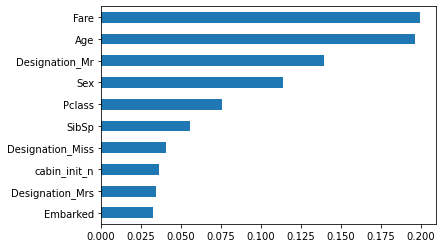

<Figure size 720x1080 with 0 Axes>

In [66]:
feature_importance = pd.Series(etc.feature_importances_, index = df_X_train.columns) 
feature_importance.nlargest(10).sort_values(ascending= True).plot(kind = 'barh')
plt.figure(figsize = (10,15))

In [67]:
# Selecting top 10 features
top_10_features = feature_importance.nlargest(10).index.to_list()

In [68]:
top_10_features

['Fare',
 'Age',
 'Designation_Mr',
 'Sex',
 'Pclass',
 'SibSp',
 'Designation_Miss',
 'cabin_init_n',
 'Designation_Mrs',
 'Embarked']

The final data will include top 10 features

In [69]:
X_train = df_X_train[top_10_features]
X_train.shape

(891, 10)

In [70]:
y_train = df_y_train
y_train.shape

(891,)

In [71]:
X_test = df_X_test[top_10_features]
X_test.shape

(418, 10)

In [72]:
y_test = df_y_test
y_test.shape

(418,)

Scaling the features for fast convergence

In [73]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [74]:
X_train_scaled  = sc.fit_transform(X_train)
X_test_scaled  = sc.fit_transform(X_test)

Training the model

In [75]:
from sklearn.model_selection import cross_val_score

Logistic Regression - Accuracy: 81.8165%            
K-Nearest Neighbours - Accuracy: 81.3665%            
Support Vector Machine - Accuracy: 82.2654%          
Decision Tree - Accuracy: 78.8996%            
Random Forest - Accuracy: 81.816%                 
Extreme Gradient Boosting (XGBoost) (Ensemble) - Accuracy: 82.4901%                 
Voting (Ensemble) - Accuracy: 85.0706%             

Training the base estimators without tuning

1. Logistic Regression

In [76]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter = 2000)
cv = cross_val_score(log, X_train_scaled, y_train, cv = 5, scoring = "accuracy")
print("The average accuracy is {} %".format(round(cv.mean()*100, 4)))
print("Accuracy for each fold {}".format(cv))

The average accuracy is 81.816 %
Accuracy for each fold [0.83798883 0.80337079 0.78651685 0.81460674 0.84831461]


2. KNN Classifier

In [77]:
# KNN classifier

from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()
cv = cross_val_score(KNC, X_train_scaled, y_train, cv = 5, scoring = "accuracy")
print("The average accuracy is {} %".format(round(cv.mean()*100, 4)))
print("Accuracy for each fold {}".format(cv))

The average accuracy is 81.3665 %
Accuracy for each fold [0.83798883 0.76966292 0.84831461 0.79213483 0.82022472]


3. Support Vector Classifier

In [78]:
# Support Vector Classifier

from sklearn.svm import SVC
svc = SVC(probability= True)
cv = cross_val_score(svc, X_train_scaled, y_train, cv = 5, scoring = "accuracy")
print("The average accuracy is {} %".format(round(cv.mean()*100, 4)))
print("Accuracy for each fold {}".format(cv))

The average accuracy is 82.2654 %
Accuracy for each fold [0.83798883 0.82022472 0.80898876 0.7752809  0.87078652]


4. Decision Tree Classifier

In [79]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state= 0)
cv = cross_val_score(DTC, X_train_scaled, y_train, cv = 5, scoring = "accuracy")
print("The average accuracy is {} %".format(round(cv.mean()*100, 4)))
print("Accuracy for each fold {}".format(cv))

The average accuracy is 78.8996 %
Accuracy for each fold [0.79329609 0.76966292 0.84269663 0.74157303 0.79775281]


5. Random Forest Classifier

In [80]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state= 0)
cv = cross_val_score(RFC, X_train_scaled, y_train, cv = 5, scoring = "accuracy")
print("The average accuracy is {} %".format(round(cv.mean()*100, 4)))
print("Accuracy for each fold {}".format(cv))

The average accuracy is 81.816 %
Accuracy for each fold [0.83798883 0.79775281 0.85393258 0.76404494 0.83707865]


6. XG Boost Classifier

In [81]:
# XGBoost Classifier

from xgboost import XGBClassifier
XGB = XGBClassifier(random_state = 1)
cv = cross_val_score(XGB, X_train_scaled, y_train, cv = 5, scoring = "accuracy")
print("The average accuracy is {} %".format(round(cv.mean()*100, 4)))
print("Accuracy for each fold {}".format(cv))

The average accuracy is 82.4901 %
Accuracy for each fold [0.83798883 0.80337079 0.87078652 0.7752809  0.83707865]


Voting ensemble

In [82]:
# Voting ensemble 

from sklearn.ensemble import VotingClassifier
Voting_clf = VotingClassifier(estimators= [('log', log), ('KNC', KNC), ('SVC', svc), ('RFC', RFC), ('XGB', XGB)], voting= 'soft')
cv = cross_val_score(Voting_clf, X_train_scaled, y_train, cv = 5, scoring = "accuracy")
print("The average accuracy is {} %".format(round(cv.mean()*100, 4)))
print("Accuracy for each fold {}".format(cv))

The average accuracy is 85.0706 %
Accuracy for each fold [0.87150838 0.83707865 0.87078652 0.80898876 0.86516854]


Performing hyper parameter tuning on base models using GridSearchCV

In [83]:
from sklearn.model_selection import GridSearchCV

Function to get best parameters and best score

In [84]:
def clf_performance(classifier, model_name):
    print(model_name)
    print("Best score : {}".format(classifier.best_score_))
    print("Best parameters : {}".format(classifier.best_params_))

After Hyper-parameter tuning the results are:            

K-Nearest Neighbours - Accuracy: 81.928%                         
Logistic Regression - Accuracy: 82.491%                    
Support Vector Machine - Accuracy: 83.053%              
Decision Tree - Accuracy: 81.707%                  
Random Forest - Accuracy: 82.153%                 
Extreme Gradient Boosting (XGBoost) (Ensemble) - Accuracy: 85.073%                
Voting (Ensemble) - Accuracy: 84.0631%                   

1. Tuning Logistic Regression

In [86]:
lr = LogisticRegression()
param_grid = {
             'max_iter': [1000], 
             'penalty' : ['l1', 'l2'], 
             'C'       : [0.2,0.4,0.7, 1.0],
             'solver'  : ['newton-cg', 'lbfgs', 'liblinear']
              }
clf_lr = GridSearchCV(estimator= lr ,param_grid= param_grid, cv= 5)
best_clf_lr = clf_lr.fit(X_train_scaled, y_train)
clf_performance(best_clf_lr, "Logistic Regression")

Logistic Regression
Best score : 0.8192831586215554
Best parameters : {'C': 0.7, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'newton-cg'}


2. Tuning KNN Classifier

In [87]:
knn = KNeighborsClassifier()
param_grid = {
             'n_neighbors': [3,5,7,9], 
             'weights'    : ['uniform', 'distance'], 
             'metric'     : ['minkowski', 'euclidean', 'manhattan']
              }
clf_knn = GridSearchCV(estimator= knn ,param_grid= param_grid, cv= 5)
best_clf_knn = clf_knn.fit(X_train_scaled, y_train)
clf_performance(best_clf_knn, "K Nearest Neighbour Classifier")

K Nearest Neighbour Classifier
Best score : 0.824913690289373
Best parameters : {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}


3. Tuning Support Vector Classifier

In [88]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'],'C': [1, 10, 100]},
                                 {'kernel': ['poly'], 'C': [ 1, 10, 100]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train_scaled,y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
SVC
Best score : 0.8305316678174629
Best parameters : {'C': 10, 'kernel': 'rbf'}


4. Tuning Decision Tree Classifier

In [89]:
dtc = DecisionTreeClassifier()
param_grid = {
             'criterion' : ['gini', 'entropy'],
             'splitter'  : ['best', 'random'],
             'min_samples_split': [0.1, 0.2, 0.3],
             'max_depth': [5,6,7,8,9,10]
             }
clf_dtc = GridSearchCV(estimator= dtc ,param_grid= param_grid,verbose = True, cv= 5, n_jobs = -1)
best_clf_dtc = clf_dtc.fit(X_train_scaled, y_train)
clf_performance(best_clf_dtc, "Decision Tree Classifier")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Decision Tree Classifier
Best score : 0.8170799070993662
Best parameters : {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 0.1, 'splitter': 'random'}


5. Tuning Random Forest Classifier

In [90]:
rfc = RandomForestClassifier()
param_grid = {
             'n_estimators': [5, 10, 15, 20,100,200],
             'max_samples' : [0.8, 0.9, 1],
             'bootstrap' : [True, False],
             'criterion' : ['gini', 'entropy'],
             'min_samples_split': [0.1, 0.2, 0.3]
             }
clf_rfc = GridSearchCV(estimator= rfc ,param_grid= param_grid,verbose = True, cv= 5, n_jobs = -1)
best_clf_rfc = clf_rfc.fit(X_train_scaled, y_train)
clf_performance(best_clf_rfc, "Random Forest Classifier")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Random Forest Classifier
Best score : 0.8215366267026551
Best parameters : {'bootstrap': True, 'criterion': 'entropy', 'max_samples': 0.8, 'min_samples_split': 0.1, 'n_estimators': 20}


6. Tuning XgBoost

In [92]:
from sklearn.model_selection import RandomizedSearchCV

In [106]:
xgb = XGBClassifier()
param_grid = {"n_estimators": [5, 10, 20, 50, 100, 200],
              "reg_alpha":[0.5,1,2,3],
              "reg_lambda":[0.5,1,2,3],
              "gamma":[0.5,1,2,3],
              "learning_rate":[0.4,0.5,0.6],
              "colsample_bytree":[0.7,0.8,0.9,1],
              "min_child_weight":[0.05,0.1,0.2]
             }
clf_xgb = RandomizedSearchCV(estimator= xgb ,param_distributions= param_grid,verbose = True, cv= 5, n_jobs = -1)
best_clf_xgb_random = clf_xgb.fit(X_train_scaled, y_train)
clf_performance(best_clf_xgb_random, "XG Boost Classifier")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
XG Boost Classifier
Best score : 0.8473667691921412
Best parameters : {'reg_lambda': 1, 'reg_alpha': 2, 'n_estimators': 20, 'min_child_weight': 0.05, 'learning_rate': 0.4, 'gamma': 0.5, 'colsample_bytree': 0.9}


Based on paramaters obtained from Randomized Search, we hypertune XGBoost

In [94]:
xgb = XGBClassifier()
param_grid = {"n_estimators": [175, 200, 225],
              "reg_alpha":[0.5, 1, 1.5],
              "reg_lambda":[2, 3],
              "gamma":[0.5],
              "learning_rate":[0.3,0.4],
              "colsample_bytree":[0.9,1],
              "min_child_weight":[0.1]
             }
clf_xgb = GridSearchCV(estimator= xgb ,param_grid= param_grid,verbose = True, cv= 5, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train_scaled, y_train)
clf_performance(best_clf_xgb, "XG Boost Classifier")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
XG Boost Classifier
Best score : 0.8507312786391312
Best parameters : {'colsample_bytree': 0.9, 'gamma': 0.5, 'learning_rate': 0.4, 'min_child_weight': 0.1, 'n_estimators': 175, 'reg_alpha': 1, 'reg_lambda': 3}


Now using the tuned models in Voting Ensemble

In [95]:
best_lr =  best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_dtc = best_clf_dtc.best_estimator_
best_xgb = best_clf_xgb.best_estimator_
best_rfc = best_clf_rfc.best_estimator_

In [96]:
estimators = [('LR', best_lr), ('KNN', best_knn), ('SVC', best_svc), ('DTC', best_dtc), ('RFC', best_rfc), ('XGB', best_xgb)]

In [97]:
from itertools import combinations

In [98]:
max_accuracy = 0
for estimator in combinations(estimators, 3):
    Voting_clf = VotingClassifier(estimators= estimator, voting= 'soft')
    cv = cross_val_score(Voting_clf, X_train_scaled, y_train, cv = 5, scoring = "accuracy")
    if (cv.mean() > max_accuracy):
        max_accuracy = cv.mean()
        estimator_final = estimator
print("The average accuracy is {} %".format(round(max_accuracy.mean()*100, 4)))
print("The best parameters are [{}]".format(estimator_final))

The average accuracy is 84.0631 %
The best parameters are [(('LR', LogisticRegression(C=0.7, max_iter=1000, solver='newton-cg')), ('DTC', DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=0.1,
                       splitter='random')), ('XGB', XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.4, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=0.1,
              missing=nan, monotone_constraints='()', n_estimators=175,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=1, reg_lambda=3, ...)))]


In [99]:
max_accuracy = 0
for estimator in combinations(estimators, 5):
    Voting_clf = VotingClassifier(estimators= estimator, voting= 'soft')
    cv = cross_val_score(Voting_clf, X_train_scaled, y_train, cv = 5, scoring = "accuracy")
    if (cv.mean() > max_accuracy):
        max_accuracy = cv.mean()
        estimator_final = estimator
print("The average accuracy is {} %".format(round(max_accuracy.mean()*100, 4)))
print("The best parameters are [{}]".format(estimator_final))

The average accuracy is 83.5007 %
The best parameters are [(('LR', LogisticRegression(C=0.7, max_iter=1000, solver='newton-cg')), ('KNN', KNeighborsClassifier(metric='manhattan', n_neighbors=9)), ('SVC', SVC(C=10, probability=True)), ('DTC', DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=0.1,
                       splitter='random')), ('XGB', XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.4, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=0.1,
              missing=nan, monotone_constraints='()', n_estimators=175,
              n_jobs=0, num_parallel_tree=1, predicto

SUBMISSION

XgBoost gives us the best results with an accuracy around 85.07%

In [103]:
#XgBoost Classifier
prediction = best_xgb.predict(X_test_scaled)
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction.astype(int)
    })
submission.to_csv('xgb_submission.csv', index=False)

Voting classifier also gave an accuracy of 85%

In [105]:
#Voting Classifier
Voting_clf.fit(X_train_scaled, y_train)
prediction = Voting_clf.predict(X_test_scaled)
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction.astype(int)
    })
submission.to_csv('vtc_submission.csv', index=False)